In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import cv2
from PIL import Image
from skimage import data, exposure
from skimage.feature import hog,local_binary_pattern
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


import warnings
warnings.filterwarnings('ignore')

from tqdm import tqdm

In [1]:
from sklearn.datasets import fetch_olivetti_faces
dataset = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [64]:
X = dataset.images
y = dataset.target
m = X.shape[0]

In [66]:
pd.Series(y).value_counts()

0     10
1     10
22    10
23    10
24    10
25    10
26    10
27    10
28    10
29    10
30    10
31    10
32    10
33    10
34    10
35    10
36    10
37    10
38    10
21    10
20    10
19    10
9     10
2     10
3     10
4     10
5     10
6     10
7     10
8     10
10    10
18    10
11    10
12    10
13    10
14    10
15    10
16    10
17    10
39    10
dtype: int64

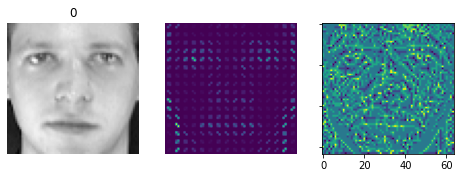

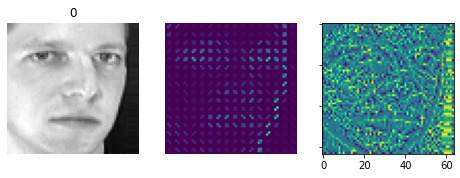

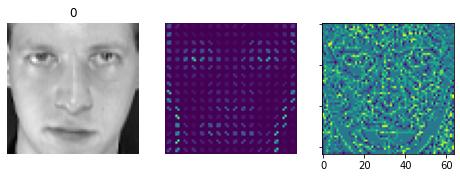

In [13]:
METHOD = 'uniform'
radius = 1
n_points = 4


for i in range (0,3):
  image = X[i]
  fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(8, 4), sharex=True, sharey=True)
  
  fd, hog_image = hog(image, orientations=2, pixels_per_cell=(4,4),cells_per_block=(4, 4), visualize=True)
  lbp_image = local_binary_pattern(image, n_points, radius, METHOD)

  ax1.axis('off')
  ax1.imshow(image, cmap=plt.cm.gray)
  ax1.set_title(y[i])

  ax2.axis('off')
  ax2.imshow(hog_image)

  ax2.axis('off')
  ax3.imshow(lbp_image)
  
  plt.show()

In [15]:
def featurize_images(X, lbp_METHOD = 'uniform',lbp_radius = 1,lbp_n_points = 4):

  m = X.shape[0]

  X_out = []

  for i in tqdm(range(0,m)):
    image = X[i]

    # HOG
    image_HOG,_ = hog(image, orientations=2, pixels_per_cell=(4,4),cells_per_block=(4, 4), visualize=True)

    # LOB
    image_lbp = local_binary_pattern(image, n_points, radius, METHOD)

    # Feature
    vectorized_space = np.r_[image_HOG.flatten(),image_lbp.flatten()]

    X_out.append(vectorized_space)

  X_out = np.array(X_out)

  return X_out

In [53]:
def get_train_test(X,y, tts=.3):

  X = pd.DataFrame(np.array(X))
  y = pd.DataFrame(y)
  m = X.shape[0]

  print('dimensoes X:',X.shape)
  print('dimensoes y:',y.shape)

  x_train, x_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=tts, random_state=42)

  print('Instancias no treino:', x_train.shape[0])
  print('Instancias no test:', x_test.shape[0])

  return x_train, x_test, y_train, y_test

In [21]:
def test_model(classifier, x_train, x_test, y_train, y_test):
  classifier.fit(x_train, y_train)
  y_pred_train = classifier.predict(x_train)
  y_pred_test = classifier.predict(x_test)
  
  print('######## TREINO ########')
  print('Acuracia:', (y_pred_train==y_train.values.reshape(1,-1)).mean())
  print(classification_report(y_train, y_pred_train))

  print('######## TESTE ########')
  print('Acuracia:', (y_pred_test==y_test.values.reshape(1,-1)).mean())
  print(classification_report(y_test, y_pred_test))
  

In [16]:
X_features = featurize_images(X)

100%|██████████| 400/400 [00:06<00:00, 63.02it/s]


In [54]:
x_train, x_test, y_train, y_test = get_train_test(X_features, y)

dimensoes X: (400, 9504)
dimensoes y: (400, 1)
Instancias no treino: 280
Instancias no test: 120


In [55]:
print('Normal com HOG + LBP:')
test_model(RandomForestClassifier(random_state=42),x_train, x_test, y_train, y_test)
print('\n\n')

Normal com HOG + LBP:
######## TREINO ########
Acuracia: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00         7
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00         7
           9       1.00      1.00      1.00         7
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00         7
          12       1.00      1.00      1.00         7
          13       1.00      1.00      1.00         7
          14       1.00      1.00      1.00         7
          15       1.00      1.00      1.00         7
          16       1

In [59]:
# # Testando regressão Logística

test_model(LogisticRegression(random_state=42, penalty='l2', C=1e-4),x_train, x_test, y_train, y_test)

######## TREINO ########
Acuracia: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00         7
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00         7
           9       1.00      1.00      1.00         7
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00         7
          12       1.00      1.00      1.00         7
          13       1.00      1.00      1.00         7
          14       1.00      1.00      1.00         7
          15       1.00      1.00      1.00         7
          16       1.00      1.00      1.0

In [63]:
# Testando KNN

test_model(KNeighborsClassifier(n_neighbors=15,weights='distance'),x_train, x_test, y_train, y_test)

######## TREINO ########
Acuracia: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00         7
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00         7
           9       1.00      1.00      1.00         7
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00         7
          12       1.00      1.00      1.00         7
          13       1.00      1.00      1.00         7
          14       1.00      1.00      1.00         7
          15       1.00      1.00      1.00         7
          16       1.00      1.00      1.0